In [1]:
#CHANGE RUN TIME TO GPU

In [2]:
#import the needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import os

In [3]:
#importing of dataset and splitting function
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [4]:
#loading dataset from the package
data = load_breast_cancer()
#print(data)
#the return data is a dictionary
#An item has a key and a corresponding value that is expressed as a pair (key: value)

#Example
"""
dictionary with integer keys
my_dict = {1: 'apple', 2: 'ball'}

dictionary with mixed keys
my_dict = {'name': 'John', 1: [2, 4, 3]}
"""

#let's check where is that target values are residing
print(data.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [5]:
#As of this sample dataset "data" is the input features
#and "target" is the target values (Expected output)
#"feature_names" means the attributes
data['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [6]:
#Visualise the imported data in the form of table

#First we have to convert the data into a two-dimensional table with rows and columns

#Turn the feature data into a dataframe
df = pd.DataFrame(data.data, columns = data.feature_names)

# Add the target columns, and fill it with the target data
df["target"] = data.target

#If the "target" attribute was in string format we need to convert it into integer labels

"""
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df["target"] = encoder.fit_transform(df['target'])
"""

df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#loading a csv file
#df = pd.read_csv("../input/breast-cancer-wisconsin-data/data.csv")

#Id column is not useful, we will drop it
#df.drop("Unnamed: 32", axis=1, inplace=True)

In [8]:
#print last few raws of the dataframe
print(df.tail())

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
564           0.11590         0.24390              0.13890         0.1726   
565           0.10340         0.14400              0.09791         0.1752   
566           0.10230         0.09251              0.05302         0.1590   
567           0.27700         0.35140              0.15200         0.2397   
568           0.04362         0.00000              0.00000         0.1587   

     mean fractal dimension  ...  worst texture  worst perimeter  wo

In [9]:
#let's see the number of patients belongs to each class
df["target"].value_counts()

######END OF VISUALIZATION OF DATA

1    357
0    212
Name: target, dtype: int64

In [10]:
#split the data into training set and test set
# store data in X and y variables
X = data.data
y = data.target

# Split the data using Scikit-Learn‘s train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [11]:
#to view the training set size
X_train.shape
#X_test.shape

(455, 30)

In [12]:
#create a model
model = keras.Sequential([
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

In [13]:
#build the model and print the model summary use the plot_model function to visualize the model
model.build((455,30))
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (455, 256)                7936      
                                                                 
 dense_1 (Dense)             (455, 128)                32896     
                                                                 
 dense_2 (Dense)             (455, 1)                  129       
                                                                 
Total params: 40961 (160.00 KB)
Trainable params: 40961 (160.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


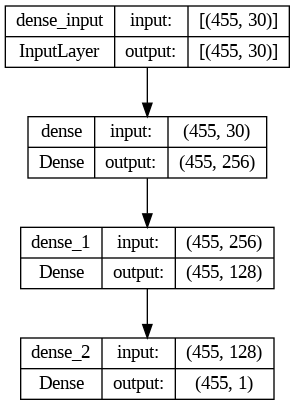

In [14]:
#we can visualize the structure of our model (ANN)
tf.keras.utils.plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [15]:
#config the model with optimizer, losses and metrics
model.compile(optimizer='Adam', loss='binary_crossentropy',
              metrics='Accuracy')

#how to put MSE in metrics
#model.compile(optimizer='Adam', loss='binary_crossentropy',
#              metrics=[tf.keras.metrics.MeanSquaredError()])

In [17]:
#train the model using the training set
history = model.fit(X_train, y_train, epochs=20)

Epoch 1/20
15/15 [==============================] - 0s 6ms/step - loss: 0.4405 - Accuracy: 0.9099
Epoch 2/20
15/15 [==============================] - 0s 7ms/step - loss: 0.6498 - Accuracy: 0.8835
Epoch 3/20
15/15 [==============================] - 0s 8ms/step - loss: 0.5011 - Accuracy: 0.9077
Epoch 4/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0197 - Accuracy: 0.8418
Epoch 5/20
15/15 [==============================] - 0s 3ms/step - loss: 0.3656 - Accuracy: 0.9275
Epoch 6/20
15/15 [==============================] - 0s 3ms/step - loss: 0.2875 - Accuracy: 0.9275
Epoch 7/20
15/15 [==============================] - 0s 4ms/step - loss: 0.3234 - Accuracy: 0.9187
Epoch 8/20
15/15 [==============================] - 0s 3ms/step - loss: 0.3841 - Accuracy: 0.9143
Epoch 9/20
15/15 [==============================] - 0s 4ms/step - loss: 0.4625 - Accuracy: 0.8857
Epoch 10/20
15/15 [==============================] - 0s 3ms/step - loss: 0.3816 - Accuracy: 0.9077
Epoch 11/20
15/15 [

In [18]:
#use the model to do prediction with
# Train and Test accuracy
scores = model.evaluate(X_train,y_train)
print("Training Accuracy: %.2f%%\n" % (scores[1]*100))
scores = model.evaluate(X_test,y_test)
print("Testing Accuracy: %.2f%%\n" % (scores[1]*100))

15/15 [==============================] - 0s 3ms/step - loss: 0.5360 - Accuracy: 0.9209
Training Accuracy: 92.09%

4/4 [==============================] - 0s 4ms/step - loss: 0.5624 - Accuracy: 0.9386
Testing Accuracy: 93.86%



In [19]:
#predict the target for test set
print(model.predict(X_test))

4/4 [==============================] - 0s 3ms/step
[[2.41281101e-04]
 [9.99999523e-01]
 [1.00000000e+00]
 [9.99149203e-01]
 [1.00000000e+00]
 [9.99999881e-01]
 [1.00000000e+00]
 [1.00000000e+00]
 [9.99986172e-01]
 [1.00000000e+00]
 [9.99957442e-01]
 [9.99716461e-01]
 [1.00000000e+00]
 [8.37769508e-01]
 [9.99932170e-01]
 [9.96158178e-09]
 [9.99999881e-01]
 [1.06332594e-22]
 [1.67063577e-03]
 [1.55169251e-30]
 [1.31722229e-13]
 [9.80607152e-01]
 [1.00000000e+00]
 [9.99999166e-01]
 [1.36010977e-03]
 [9.99956369e-01]
 [9.99999404e-01]
 [1.00000000e+00]
 [9.99999881e-01]
 [2.96785544e-33]
 [1.00000000e+00]
 [1.57644392e-26]
 [9.99985576e-01]
 [8.00566902e-09]
 [1.00000000e+00]
 [1.00266108e-10]
 [9.99920011e-01]
 [2.88297625e-14]
 [9.99998569e-01]
 [2.16085461e-08]
 [7.72040486e-02]
 [9.99999404e-01]
 [1.08081215e-08]
 [1.00000000e+00]
 [9.99915957e-01]
 [9.95737740e-29]
 [1.00000000e+00]
 [9.99997616e-01]
 [1.00000000e+00]
 [2.64463201e-03]
 [2.84269595e-06]
 [1.00000000e+00]
 [2.91491649e

In [20]:

prediction = tf.cast(tf.greater(model.predict(X_test), 0.5), tf.int32)

print("Prediction:", prediction[2], "Target:", y_test[2])

4/4 [==============================] - 0s 2ms/step
Prediction: tf.Tensor([1], shape=(1,), dtype=int32) Target: 1


In [21]:
#find what all values related to the model are automatically saved
print(history.history.keys())

dict_keys(['loss', 'Accuracy'])


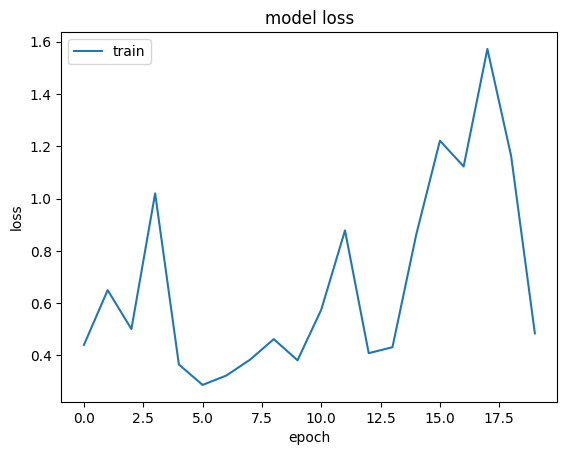

In [22]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [23]:
#spilt training set into training and validation set and fit a model
history = model.fit(X_train, y_train,validation_split = 0.1,
                    epochs=100, batch_size=32)

Epoch 1/100
13/13 [==============================] - 0s 9ms/step - loss: 0.7602 - Accuracy: 0.8875 - val_loss: 1.4467 - val_Accuracy: 0.8913
Epoch 2/100
13/13 [==============================] - 0s 5ms/step - loss: 0.7315 - Accuracy: 0.9071 - val_loss: 0.4153 - val_Accuracy: 0.8913
Epoch 3/100
13/13 [==============================] - 0s 5ms/step - loss: 0.3680 - Accuracy: 0.9315 - val_loss: 0.3872 - val_Accuracy: 0.8696
Epoch 4/100
13/13 [==============================] - 0s 6ms/step - loss: 0.3340 - Accuracy: 0.9291 - val_loss: 0.3508 - val_Accuracy: 0.8913
Epoch 5/100
13/13 [==============================] - 0s 6ms/step - loss: 0.3752 - Accuracy: 0.9267 - val_loss: 0.4939 - val_Accuracy: 0.9130
Epoch 6/100
13/13 [==============================] - 0s 5ms/step - loss: 0.5163 - Accuracy: 0.8973 - val_loss: 0.3631 - val_Accuracy: 0.8913
Epoch 7/100
13/13 [==============================] - 0s 7ms/step - loss: 0.3945 - Accuracy: 0.9169 - val_loss: 0.4717 - val_Accuracy: 0.9130
Epoch 8/100
1

In [24]:
print(history.history.keys())

dict_keys(['loss', 'Accuracy', 'val_loss', 'val_Accuracy'])


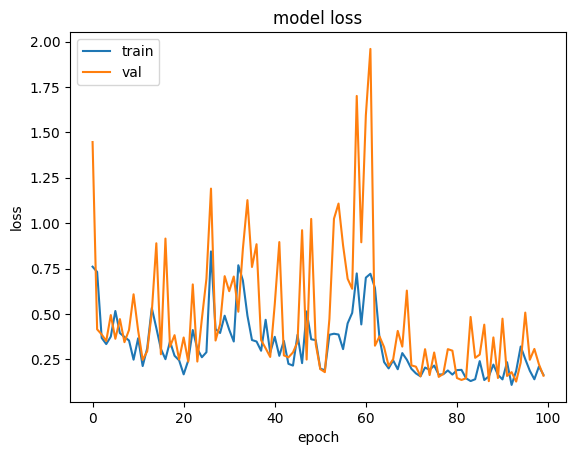

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

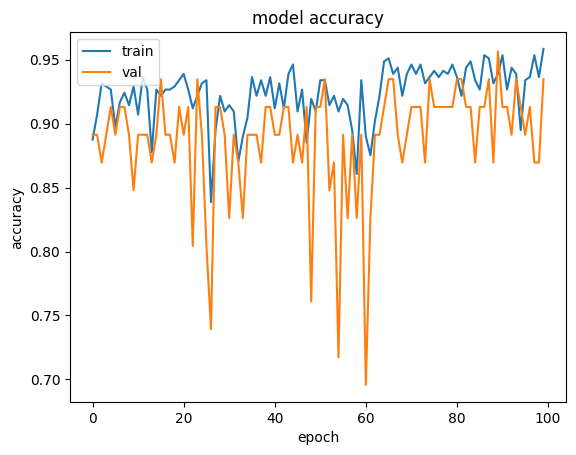

In [26]:
plt.plot(history.history['Accuracy'])
plt.plot(history.history['val_Accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
#If we want to save the model parameters at a particular time we use ModelCheckpoint

checkpoint_path = "/content/drive/MyDrive/checkpoints/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 monitor='val_loss',
                                                 verbose=1,
                                                 save_best_only=True)



# Model weights are saved at the end of every epoch, if it's the best seen so far.

# Loads the weights
#model.load_weights(checkpoint_path)

# Train the model with the new callback
model.fit(X_train,
          y_train,
          epochs=50,
          validation_split = 0.1,
#        validation_data=(X_test, y_test),
          callbacks=[cp_callback])  # Pass callback to training

# This may generate warnings related to saving the state of the optimizer.
# These warnings (and similar warnings throughout this notebook)
# are in place to discourage outdated usage, and can be ignored.


Epoch 1/50
 1/13 [=>............................] - ETA: 0s - loss: 0.3151 - Accuracy: 0.9688
Epoch 1: val_loss improved from inf to 0.39770, saving model to /content/drive/MyDrive/checkpoints/cp.ckpt
13/13 [==============================] - 0s 35ms/step - loss: 0.3052 - Accuracy: 0.9169 - val_loss: 0.3977 - val_Accuracy: 0.8696
Epoch 2/50
 1/13 [=>............................] - ETA: 0s - loss: 0.0486 - Accuracy: 0.9688
Epoch 2: val_loss did not improve from 0.39770
13/13 [==============================] - 0s 4ms/step - loss: 0.2190 - Accuracy: 0.9389 - val_loss: 0.7473 - val_Accuracy: 0.8913
Epoch 3/50
 1/13 [=>............................] - ETA: 0s - loss: 0.1652 - Accuracy: 0.9688
Epoch 3: val_loss improved from 0.39770 to 0.39038, saving model to /content/drive/MyDrive/checkpoints/cp.ckpt
13/13 [==============================] - 0s 9ms/step - loss: 0.2902 - Accuracy: 0.9095 - val_loss: 0.3904 - val_Accuracy: 0.8696
Epoch 4/50
 1/13 [=>............................] - ETA: 0s - los

In [ ]:
#use the model to do prediction with
# Train and Test accuracy
scores = model.evaluate(X_train,y_train)
print("Training Accuracy: %.2f%%\n" % (scores[1]*100))
scores = model.evaluate(X_test,y_test)
print("Testing Accuracy: %.2f%%\n" % (scores[1]*100))

15/15 [==============================] - 0s 2ms/step - loss: 0.4506 - Accuracy: 0.8593
Training Accuracy: 85.93%

4/4 [==============================] - 0s 3ms/step - loss: 0.5313 - Accuracy: 0.8421
Testing Accuracy: 84.21%



In [ ]:
# Loads the weights
model.load_weights(checkpoint_path)

In [ ]:
#use the model to do prediction with
# Train and Test accuracy
scores = model.evaluate(X_train,y_train)
print("Training Accuracy: %.2f%%\n" % (scores[1]*100))
scores = model.evaluate(X_test,y_test)
print("Testing Accuracy: %.2f%%\n" % (scores[1]*100))

15/15 [==============================] - 0s 2ms/step - loss: 0.1104 - Accuracy: 0.9648
Training Accuracy: 96.48%

4/4 [==============================] - 0s 3ms/step - loss: 0.1485 - Accuracy: 0.9474
Testing Accuracy: 94.74%



In [ ]:
#Normalize the inputs into a distribution centered around 0 with standard deviation 1. It accomplishes this by precomputing the mean and variance of the data, and calling (input-mean)/sqrt(var) at runtime.
"""
layer = tf.keras.layers.experimental.preprocessing.Normalization()
layer.adapt(X_train)
"""

'\nlayer = tf.keras.layers.experimental.preprocessing.Normalization()\nlayer.adapt(X_train)\n'